Importing the Dependencies

UnSupervised Data from mall customers

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

Data Collection and Analysis

In [2]:
#loadin the data from csv file to a pandas dataframe
customer_data = pd.read_csv('/content/Mall_Customers.csv')

In [3]:
# first 5 rows in the dataframe
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
#finding the number of rows and columns
customer_data.shape

(200, 5)

In [6]:
#getting some information about the dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
#checking for missing values
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Choosing the annual income column & spending score column

In [8]:
#iloc is used to locate the particular column and rows
X = customer_data.iloc[:,[3,4]].values

In [ ]:
print(X)

Choosing the number of Clusters

WCSS- Within Clusters Sum of Squares

In [10]:
#finding the wcss value for different number of clusters
# we will choose the no of clusters which have the minimum WCSS value
#random_state is uesed for the reproducibility of the code
#kmeans.inertia will give us the wcss values for each clusters.
wcss=[]

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

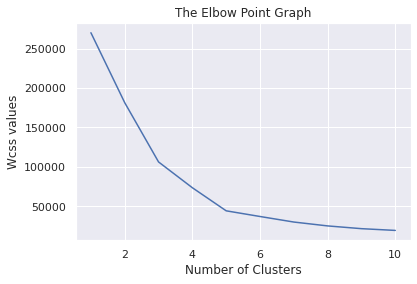

In [11]:
# plot an elbow graph to find which cluster has minimum value

sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('Wcss values')
plt.show()

In [12]:
#We will select the minimum elbow point after which there is no significant drop in the Wcss value.
 Since there are two elbow points here at value=3, and 5. therefore we will select 5 
 because after that point there is no significant drop in the Wcss value

Optimum number of Clusters = 5

Training the k-means clustering model

In [15]:
kmeans= KMeans(n_clusters=5, init='k-means++', random_state=0)

#return a label for each atapoint based on theie cluster
Y= kmeans.fit_predict(X)

print(Y)

[3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 0 3 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 4 2 0 2 4 2 4 2 0 2 4 2 4 2 4 2 4 2 0 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


5 Clusters- 0,1,2,3,4

Visualising all the clusters

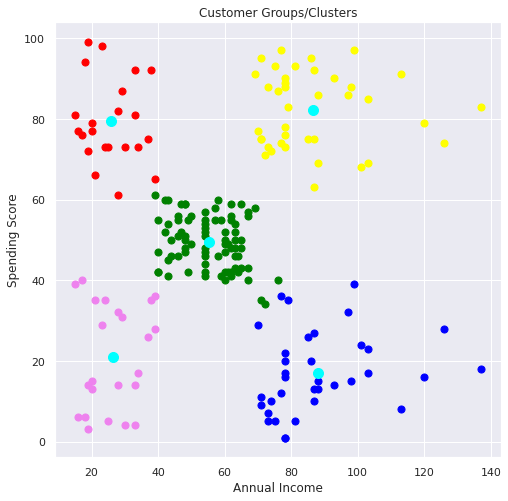

In [17]:
# plotting all the clusters and their centroids
# s is the size of the dots in the scatter plot
#X[y=0,0] :--- this represents X axis in which the first value of y==0,0 
#represents 0 cluster value and the second the second zero in y value represents
# the 0 i.e., 1 column in X . 


plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s= 50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s= 50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s= 50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s= 50, c='violet', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s= 50, c='blue', label='Cluster 5')

#plot the centroids
# 0 represents the x axis value of the centroids
# 1 represents the y anxis value of the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups/Clusters')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()